# Random Forest Regressor 

In [2]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import time

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor


In [3]:
# Imports data
x = pd.read_csv('x.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
x

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-01-04,0.373032,0.275060,0.083938,0.664201,0.601652,0.769184,0.748975,0.760298,0.940532,1.843950,...,-0.215571,0.077728,0.083014,-0.583570,0.175899,1.2,3.714687,-0.584329,0.134978,16.1885
1992-01-05,0.532885,0.549297,0.514589,-0.873850,0.546742,0.324748,0.546363,0.580914,0.647050,3.074505,...,0.097556,-0.255295,-0.251432,-0.072648,-0.088998,2.0,-5.294144,0.020679,0.410802,14.7280
1992-01-06,0.417254,0.444719,0.269590,1.048664,0.280383,0.059695,-0.239920,-0.304895,-0.484071,-1.398611,...,0.318864,0.023712,0.250035,0.795664,-0.088298,1.2,4.562073,0.881246,-0.087417,14.7531
1992-01-07,-0.079646,-0.134642,0.334203,1.330298,0.708002,0.893837,0.995847,1.126762,1.294361,2.614598,...,-0.233369,0.264845,-0.416910,-1.518733,-0.000307,-3.8,-0.352309,-0.854378,0.216749,13.3036
1992-01-08,0.386454,0.380539,0.246840,-1.603560,0.324124,-0.549192,-0.106279,-0.111965,0.036867,-0.863906,...,-0.032213,-0.285966,0.499100,1.157537,0.086992,-0.5,-0.633643,1.163376,0.042164,14.4223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,-0.613838,0.175427,-0.107940,0.300155,-0.590025,2.9,-0.283245,-0.123254,0.880929,21.7702
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,1.425376,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269
2023-01-02,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.416042,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141


In [4]:
y = pd.read_csv('y.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
print(y.shape)
y = y.iloc[:,0]
y

(373, 1)


sasdate
1992-01-05    0.214977
1992-01-06    0.285919
1992-01-07    0.285104
1992-01-08    0.213295
1992-01-09    0.212842
                ...   
2023-01-01    0.515742
2023-01-02    0.369323
2023-01-03    0.053028
2023-01-04    0.367109
2023-01-05    0.124049
Name: Inflation, Length: 373, dtype: float64

## PCA

n_components: 1    variance explained: 0.223
n_components: 2    variance explained: 0.313
n_components: 3    variance explained: 0.390
n_components: 4    variance explained: 0.450
n_components: 5    variance explained: 0.491
n_components: 6    variance explained: 0.527
n_components: 7    variance explained: 0.555
n_components: 8    variance explained: 0.580
n_components: 9    variance explained: 0.602
n_components: 10    variance explained: 0.623
n_components: 11    variance explained: 0.643
n_components: 12    variance explained: 0.661
n_components: 13    variance explained: 0.678
n_components: 14    variance explained: 0.695
n_components: 15    variance explained: 0.710
n_components: 16    variance explained: 0.723
n_components: 17    variance explained: 0.737
n_components: 18    variance explained: 0.749
n_components: 19    variance explained: 0.761
n_components: 20    variance explained: 0.773
n_components: 30    variance explained: 0.859
n_components: 40    variance explained: 0.9

Text(0.5, 1.0, 'Elbow curve')

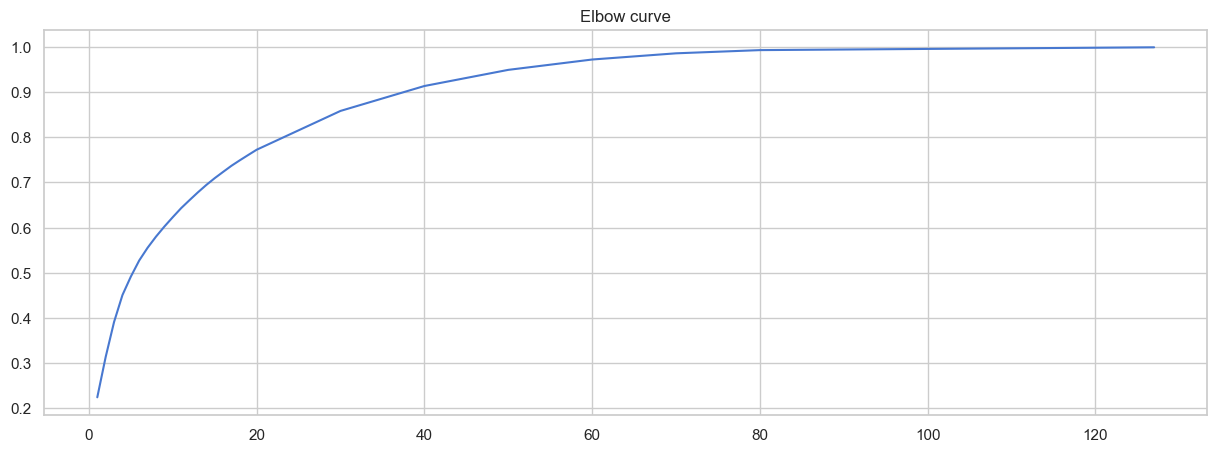

In [5]:
#select a suitable number of components for PCA
n_trial = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,127]
distorsions = []

for n_comp in n_trial:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(x)
    
    distorsions.append(X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
fig = plt.figure(figsize=(15, 5))
plt.plot(n_trial, distorsions)
plt.grid(True)
plt.title('Elbow curve')


As shown, 20 to 40 is a reason number of components to be used. 

n_components: 1    variance explained: 0.223
n_components: 10    variance explained: 0.623
n_components: 20    variance explained: 0.773
n_components: 22    variance explained: 0.794
n_components: 24    variance explained: 0.813
n_components: 26    variance explained: 0.830
n_components: 28    variance explained: 0.845
n_components: 30    variance explained: 0.859
n_components: 32    variance explained: 0.872
n_components: 34    variance explained: 0.884
n_components: 36    variance explained: 0.895
n_components: 38    variance explained: 0.905
n_components: 40    variance explained: 0.914


Text(0.5, 1.0, 'Elbow curve')

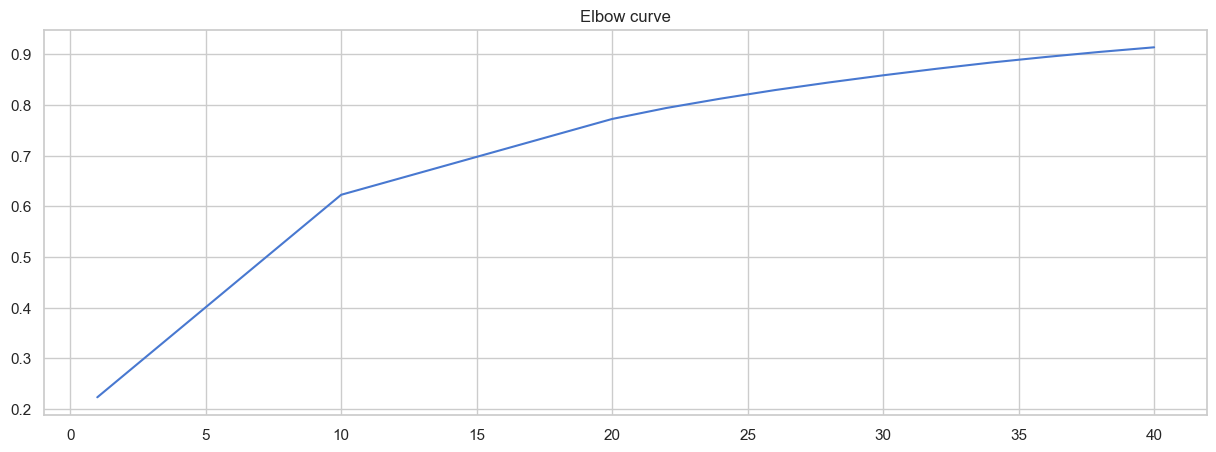

In [9]:
#fine-tune the number of components 
n_trial = [1,10,20,22,24,26,28,30,32,34,36,38,40]
distorsions = []

for n_comp in n_trial:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(x)
    
    distorsions.append(X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
fig = plt.figure(figsize=(15, 5))
plt.plot(n_trial, distorsions)
plt.grid(True)
plt.title('Elbow curve')


I decided to use 22 components. 

## Grid Search for Optimal Hyperparameters

In [6]:
n_train = int(len(x)*0.8)   #use 80% for train
n_records = len(x)
n_forecast = n_records-n_train

j = 0
for i in range(n_train, n_records):    
    #train, test = X[0:i], X[i:i+1]   #expanding window
    train, test = x[j:i], x[i:i+1]   #rolling window
#    print('train=%d, test=%d' % (len(train), len(test)))
    j += 1

In [7]:
# pipeline
def pipeline(config):

    # unpack config
    n_trees, n_comps, max_d, min_l, max_f = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components=n_comps, random_state=1)),
             ('rfr', RandomForestRegressor(n_estimators=n_trees, max_depth=max_d, min_samples_leaf=min_l, max_features=max_f, random_state=1))
            ]

    pipeline = Pipeline(steps)

    return pipeline



In [8]:
def walk_forward_validation(cfg):
    
    n_train = int(len(x)*0.8)  

    n_records = len(x)

    y_test_list = []

    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):
    
        X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)      
    
        y_pred = model.predict(X_test)

        y_pred_list.extend(y_pred)
       
        y_test_list.extend(y_test)
    
        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [9]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [10]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [11]:
# create a list of configs to try
def model_configs():
    # define scope of configs
    
    n_trees = [20,50,100,300]
    n_comps = [22]
    max_d = [None,5,10]
    min_l = [1]
    max_f = [1.0,0.5,0.3]
        
    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [12]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 36
 > 0.305
> Model[[20, 22, None, 1, 1.0]] 0.305
 > 0.319
> Model[[20, 22, None, 1, 0.5]] 0.319
 > 0.326
> Model[[20, 22, None, 1, 0.3]] 0.326
 > 0.312
> Model[[20, 22, 5, 1, 1.0]] 0.312
 > 0.311
> Model[[20, 22, 5, 1, 0.5]] 0.311
 > 0.327
> Model[[20, 22, 5, 1, 0.3]] 0.327
 > 0.307
> Model[[20, 22, 10, 1, 1.0]] 0.307
 > 0.322
> Model[[20, 22, 10, 1, 0.5]] 0.322
 > 0.325
> Model[[20, 22, 10, 1, 0.3]] 0.325
 > 0.300
> Model[[50, 22, None, 1, 1.0]] 0.300
 > 0.303
> Model[[50, 22, None, 1, 0.5]] 0.303
 > 0.316
> Model[[50, 22, None, 1, 0.3]] 0.316
 > 0.298
> Model[[50, 22, 5, 1, 1.0]] 0.298
 > 0.304
> Model[[50, 22, 5, 1, 0.5]] 0.304
 > 0.311
> Model[[50, 22, 5, 1, 0.3]] 0.311
 > 0.300
> Model[[50, 22, 10, 1, 1.0]] 0.300
 > 0.304
> Model[[50, 22, 10, 1, 0.5]] 0.304
 > 0.316
> Model[[50, 22, 10, 1, 0.3]] 0.316
 > 0.296
> Model[[100, 22, None, 1, 1.0]] 0.296
 > 0.300
> Model[[100, 22, None, 1, 0.5]] 0.300
 > 0.304
> Model[[100, 22, None, 1, 0.3]] 0.304
 > 0.294
> Model[[100,

In [13]:
scores

[('[20, 22, 5, 1, 0.3]', 0.32684746234848927),
 ('[20, 22, None, 1, 0.3]', 0.326487358070582),
 ('[20, 22, 10, 1, 0.3]', 0.32549732730742925),
 ('[20, 22, 10, 1, 0.5]', 0.32245246927890187),
 ('[20, 22, None, 1, 0.5]', 0.31915817075009356),
 ('[50, 22, 10, 1, 0.3]', 0.3164541488049404),
 ('[50, 22, None, 1, 0.3]', 0.31572534055454526),
 ('[20, 22, 5, 1, 1.0]', 0.3117378856335478),
 ('[20, 22, 5, 1, 0.5]', 0.31089339042384184),
 ('[50, 22, 5, 1, 0.3]', 0.3107151288072095),
 ('[20, 22, 10, 1, 1.0]', 0.30672240469600726),
 ('[100, 22, 10, 1, 0.3]', 0.3054628693957283),
 ('[20, 22, None, 1, 1.0]', 0.3052074623762788),
 ('[100, 22, None, 1, 0.3]', 0.30421564676648694),
 ('[50, 22, 5, 1, 0.5]', 0.30419545163560413),
 ('[50, 22, 10, 1, 0.5]', 0.3037028787379321),
 ('[50, 22, None, 1, 0.5]', 0.3033157774367838),
 ('[100, 22, 5, 1, 0.3]', 0.3024533317802686),
 ('[100, 22, 10, 1, 0.5]', 0.3009223141849552),
 ('[50, 22, None, 1, 1.0]', 0.3001430018009138),
 ('[100, 22, None, 1, 0.5]', 0.300058421

In [23]:
# create a list of configs to try
def model_configs2():
    # define scope of configs
    
    n_trees = [100,200,300,400,500]
    n_comps = [22]
    max_d = [5,7,10]
    min_l = [1]
    max_f = [1.0,0.7,0.5]
        
    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [24]:
cfg_list = model_configs2()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 45
 > 0.294
> Model[[100, 22, 5, 1, 1.0]] 0.294
 > 0.294
> Model[[100, 22, 5, 1, 0.7]] 0.294
 > 0.298
> Model[[100, 22, 5, 1, 0.5]] 0.298
 > 0.296
> Model[[100, 22, 7, 1, 1.0]] 0.296
 > 0.300
> Model[[100, 22, 7, 1, 0.7]] 0.300
 > 0.296
> Model[[100, 22, 7, 1, 0.5]] 0.296
 > 0.298
> Model[[100, 22, 10, 1, 1.0]] 0.298
 > 0.297
> Model[[100, 22, 10, 1, 0.7]] 0.297
 > 0.301
> Model[[100, 22, 10, 1, 0.5]] 0.301
 > 0.295
> Model[[200, 22, 5, 1, 1.0]] 0.295
 > 0.295
> Model[[200, 22, 5, 1, 0.7]] 0.295
 > 0.296
> Model[[200, 22, 5, 1, 0.5]] 0.296
 > 0.296
> Model[[200, 22, 7, 1, 1.0]] 0.296
 > 0.297
> Model[[200, 22, 7, 1, 0.7]] 0.297
 > 0.293
> Model[[200, 22, 7, 1, 0.5]] 0.293
 > 0.298
> Model[[200, 22, 10, 1, 1.0]] 0.298
 > 0.296
> Model[[200, 22, 10, 1, 0.7]] 0.296
 > 0.295
> Model[[200, 22, 10, 1, 0.5]] 0.295
 > 0.294
> Model[[300, 22, 5, 1, 1.0]] 0.294
 > 0.292
> Model[[300, 22, 5, 1, 0.7]] 0.292
 > 0.293
> Model[[300, 22, 5, 1, 0.5]] 0.293
 > 0.295
> Model[[300, 22, 7, 1

In [25]:
scores

[('[100, 22, 10, 1, 0.5]', 0.3009223141849552),
 ('[100, 22, 7, 1, 0.7]', 0.3002049818195004),
 ('[100, 22, 5, 1, 0.5]', 0.2982241849081857),
 ('[100, 22, 10, 1, 1.0]', 0.2981262405150667),
 ('[200, 22, 10, 1, 1.0]', 0.2977001399771565),
 ('[200, 22, 7, 1, 0.7]', 0.2971778871432642),
 ('[100, 22, 10, 1, 0.7]', 0.29700800777365916),
 ('[100, 22, 7, 1, 1.0]', 0.29611345183920473),
 ('[200, 22, 7, 1, 1.0]', 0.2959661753483762),
 ('[300, 22, 10, 1, 1.0]', 0.29596143344670095),
 ('[200, 22, 10, 1, 0.7]', 0.29575109517009507),
 ('[200, 22, 5, 1, 0.5]', 0.2957188446236299),
 ('[100, 22, 7, 1, 0.5]', 0.29555672823730206),
 ('[200, 22, 10, 1, 0.5]', 0.2954805951984234),
 ('[500, 22, 10, 1, 0.5]', 0.29546884572575327),
 ('[200, 22, 5, 1, 0.7]', 0.2953155513356156),
 ('[400, 22, 10, 1, 0.5]', 0.29526717901204635),
 ('[200, 22, 5, 1, 1.0]', 0.2948142104172452),
 ('[300, 22, 7, 1, 1.0]', 0.2946683236422227),
 ('[300, 22, 7, 1, 0.7]', 0.2945287801417022),
 ('[100, 22, 5, 1, 1.0]', 0.2944294016651518

## Final model

In [26]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=22, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_leaf=1, max_features=0.7, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(x)*0.8)  

n_records = len(x)

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

print("done")

end=time.time()

print("Running Time:", end - start)

done
Running Time: 121.70100092887878


In [27]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,-0.046731,0.062483
1,0.123339,0.083725
2,-0.077428,0.257653
3,0.065142,0.083568
4,0.032760,0.251813
5,0.384124,0.200610
6,0.509340,0.264661
7,0.077475,0.322714
8,0.266445,0.052780
9,0.210467,0.250985


<Axes: >

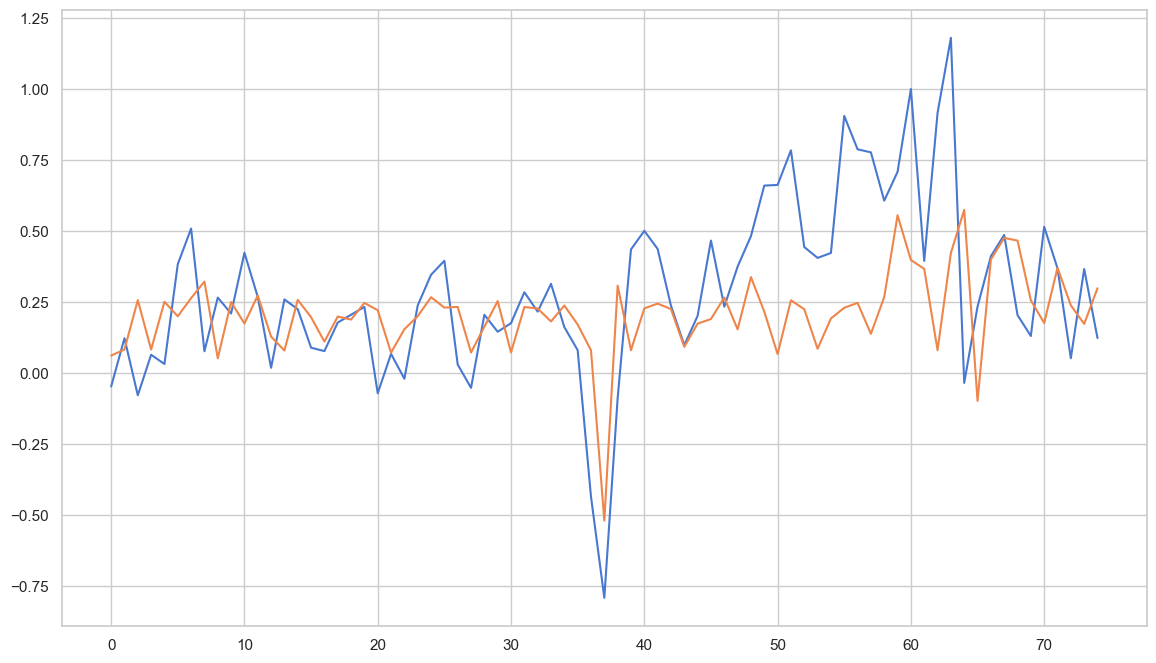

In [28]:
result['Actual'].plot()
result['Predicted'].plot()

Report: error in the use of np.ravel <= resolved by modifying y into suitable datatype <br>
error in setting max_features = 1 but not 1.0 <br>
runtime so longggggg